In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
df=pd.read_csv("car_evaluation.csv")
df.head(5)

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.shape

(1728, 7)

In [ ]:
df.size

12096

In [ ]:
df.describe()

,doors,persons
count,1728.000000,1728.000000
mean,3.500000,3.666667
std,1.118358,1.247580
min,2.000000,2.000000
25%,2.750000,2.000000
50%,3.500000,4.000000
75%,4.250000,5.000000
max,5.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   int64 
 3   persons   1728 non-null   int64 
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   outcome   1728 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


In [ ]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
outcome,0


In [ ]:
X=df.iloc[:,:-1]
y=df[["outcome"]]

In [ ]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5,5,med,med
1724,low,low,5,5,med,high
1725,low,low,5,5,big,low
1726,low,low,5,5,big,med


In [ ]:
y

,outcome
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


In [ ]:
encoder=LabelEncoder()
X.buying=encoder.fit_transform(X.buying)
X.maint=encoder.fit_transform(X.maint)
X.lug_boot=encoder.fit_transform(X.lug_boot)
X.safety=encoder.fit_transform(X.safety)

In [ ]:
X.buying.head()

,buying
0,3
1,3
2,3
3,3
4,3


In [ ]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,2,1
1,3,3,2,2,2,2
2,3,3,2,2,2,0
3,3,3,2,2,1,1
4,3,3,2,2,1,2


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [ ]:
model=RandomForestClassifier(n_estimators=25,max_depth=15,bootstrap=False)
model.fit(X_train,y_train)
model

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(bootstrap=False, max_depth=15, n_estimators=25)

In [ ]:
predict=model.predict(X_test)

In [ ]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         acc       0.95      0.93      0.94        89
        good       0.86      0.80      0.83        15
       unacc       0.98      0.99      0.99       308
       vgood       0.90      0.90      0.90        20

    accuracy                           0.97       432
   macro avg       0.92      0.91      0.91       432
weighted avg       0.97      0.97      0.97       432



In [ ]:
confusion_matrix(y_test,predict)

array([[ 83,   1,   5,   0],
       [  1,  12,   0,   2],
       [  2,   0, 306,   0],
       [  1,   1,   0,  18]])

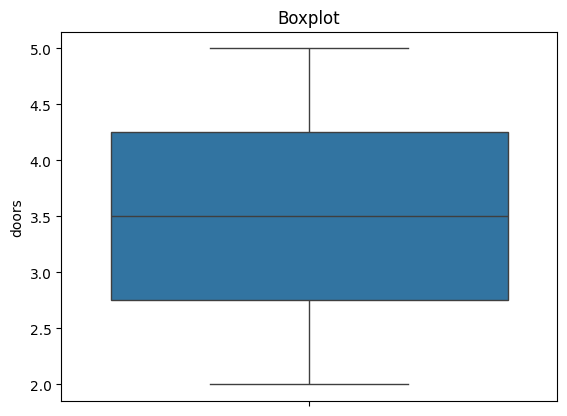

In [ ]:
sns.boxplot(df['doors'])
plt.title('Boxplot')
plt.show()

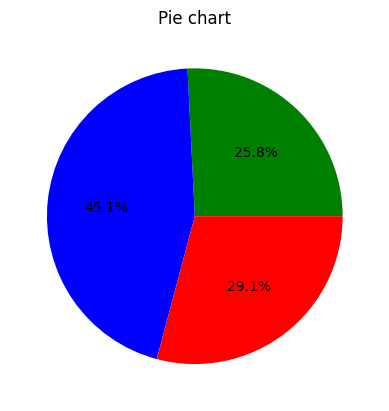

In [ ]:
plt.pie(doors_data, autopct='%1.1f%%', colors=['green', 'blue', 'red'])
plt.title('Pie chart')
plt.show()